In [1]:
import pandas as pd

df=pd.read_excel("C:/Users/ASUS/Downloads/CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail/Online Retail.xlsx")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
495,536409,20669,RED HEART LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
496,536409,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
497,536409,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-01 11:45:00,2.95,17908,United Kingdom


In [2]:
#Removing leading and trailing spaces 
x = df.columns
df.columns = [i.strip() for i in x]  # Update the DataFrame columns directly
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [3]:
#null values

null_values=df[df.isnull().any(axis=1)]
null_values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [4]:
#check for the column duplicacy
duplicated_row_check=df.columns.duplicated()
if True in duplicated_row_check:
    print(f"Duplicate column found : {df.columns[duplicated_row_check]}")
else:
    print(f"No Duplicate column found")

No Duplicate column found


In [5]:
column_data_types = df.dtypes
column_data_types

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [ ]:
#Changing the datatype of the column if inaccurate 

#Step1: Determining the datatype of the column
def determine_type(value):
    value = value.strip()  
    try:
        datetime.strptime(value, "%Y-%m-%d")  # Format: YYYY-MM-DD
        return "Datetime"
    except ValueError:
        pass
    try:
        float(value)
        return "Float"
    except ValueError:
        pass
    
    if value.isdigit():
        return "Number"

    return "Object."



#Step2: To figure out which datatype is present in the column and changing the datatype
def figure_out(df):
    df=df.astype(str)
    for i in df.columns:
        for j in df[i]:
            if determine_type(j)=="Number":
                df[i]=df[i].astype(int)
            elif determine_type(j)=="Datetime":
                df[i]=pd.to_datetime(df[i], errors='coerce')
            elif determine_type(i)=="Float":
                df[i]=df[i].astype(float)
            else:
                df[i]=df[i].astype(object)
    return df


In [6]:
dataframe = pd.DataFrame(df)
duplicates = dataframe[dataframe.duplicated(keep=False)]  # Marks all duplicate rows, including the first occurrence

# Show the duplicate rows
print(duplicates)


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [7]:
def finding_null_values(df):
    # Find rows with at least one null value
    null_rows = df[df.isnull().any(axis=1)]
    
    # Only keep columns that contain null values in the null rows
    null_rows_with_null_columns = null_rows.loc[:, null_rows.isnull().any()]
    
    return null_rows_with_null_columns
null_values = finding_null_values(df)
null_values

""


In [20]:
def trimming_unnecessary_spaces(dataset,column):
    for i in range(len(dataset)):
        dataset[column][i]=dataset[column][i].strip()
trimming_unnecessary_spaces(df,'Description')
trimming_unnecessary_spaces(df,'Country')
df




C:\Users\ASUS\AppData\Local\Temp\ipykernel_30120\3498139386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column][i]=dataset[column][i].strip()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
495,536409,20669,RED HEART LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
496,536409,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
497,536409,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-01 11:45:00,2.95,17908,United Kingdom


In [22]:
#fill the null values
def filling_the_null_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # For object columns
            df[column].fillna('No information', inplace=True)
        elif df[column].dtype=='int' or df[column].dtype=='float':
            df[column] = pd.to_numeric(df[column], errors='coerce')
            
            # Compute rolling mean and fill null values
            rolling_mean = df[column].rolling(window=10, min_periods=1).mean()
            df[column] = df[column].fillna(rolling_mean)


    return df

filling_the_null_values(df)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
495,536409,20669,RED HEART LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
496,536409,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
497,536409,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-01 11:45:00,2.95,17908,United Kingdom


In [25]:
df["Sales"]=df["UnitPrice"]*df["Quantity"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,1.25
495,536409,20669,RED HEART LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,1.25
496,536409,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,2.95
497,536409,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,2.95


In [27]:
furniture_df = df[df['Country'] == 'United Kingdom']
region_subcategory_totals = furniture_df.groupby(['CustomerID', 'StockCode'])['Sales'].sum().reset_index()
region_subcategory_totals

,CustomerID,StockCode,Sales
0,13047,21754,17.85
1,13047,21755,17.85
2,13047,21756,17.85
3,13047,21777,31.80
4,13047,22310,9.90
...,...,...,...
392,18074,22464,19.80
393,18074,22469,58.00
394,18074,22470,102.00
395,18074,82484,19.35


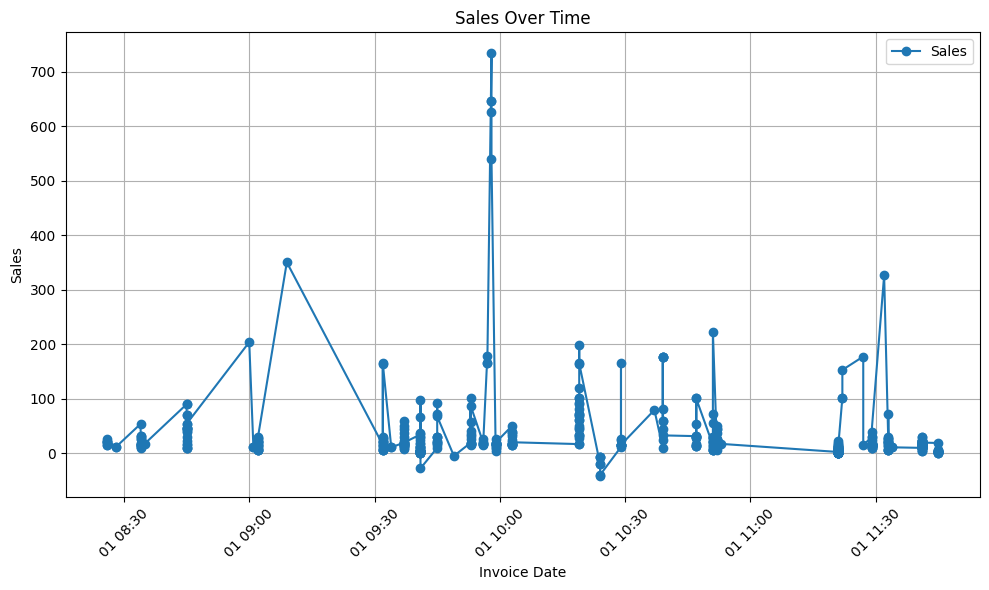

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot( df['InvoiceDate'],df["Sales"], marker='o', label='Sales')
plt.xlabel('Invoice Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [36]:
newdf=df[['InvoiceDate','Sales']]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [37]:
result = adfuller(df["Sales"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -7.172803223207423
p-value: 2.776220036899936e-10


In [38]:
if result[1] > 0.05:
    print("Data is non-stationary. Applying differencing...")
    df["Sales_diff"] = df["Sales"].diff().dropna()
else:
    print("Data is stationary.")


Data is stationary.


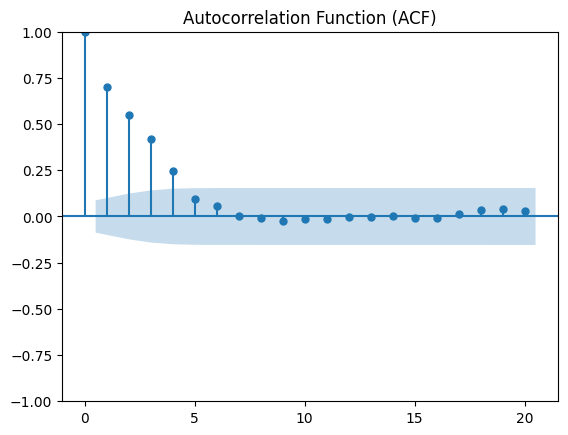

In [39]:
# Step 3: Plot ACF and PACF to determine ARIMA orders
plot_acf(df["Sales"].dropna(), lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()


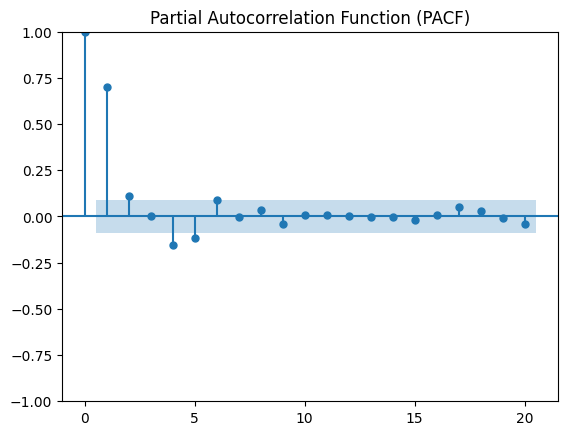

In [40]:
plot_pacf(df["Sales"].dropna(), lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [41]:
# Step 4: Fit the ARIMA Model
# Choose ARIMA(p, d, q) based on ACF/PACF
model = ARIMA(df["Sales"], order=(1, 1, 1))  # Example: (p=1, d=1, q=1)
model_fit = model.fit()


In [42]:
# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  499
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2680.093
Date:                Sun, 19 Jan 2025   AIC                           5366.186
Time:                        22:18:15   BIC                           5378.818
Sample:                             0   HQIC                          5371.144
                                - 499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6993      0.015     45.449      0.000       0.669       0.729
ma.L1         -0.9949      0.012    -81.924      0.000      -1.019      -0.971
sigma2      2751.1795     41.753     65.891      0.0

In [47]:
# Step 5: Forecast
forecast_steps = 500
forecast = model_fit.forecast(steps=forecast_steps)

forecast

499    12.504392
500    16.808371
501    19.818292
502    21.923235
503    23.395294
         ...    
994    26.819240
995    26.819240
996    26.819240
997    26.819240
998    26.819240
Name: predicted_mean, Length: 500, dtype: float64

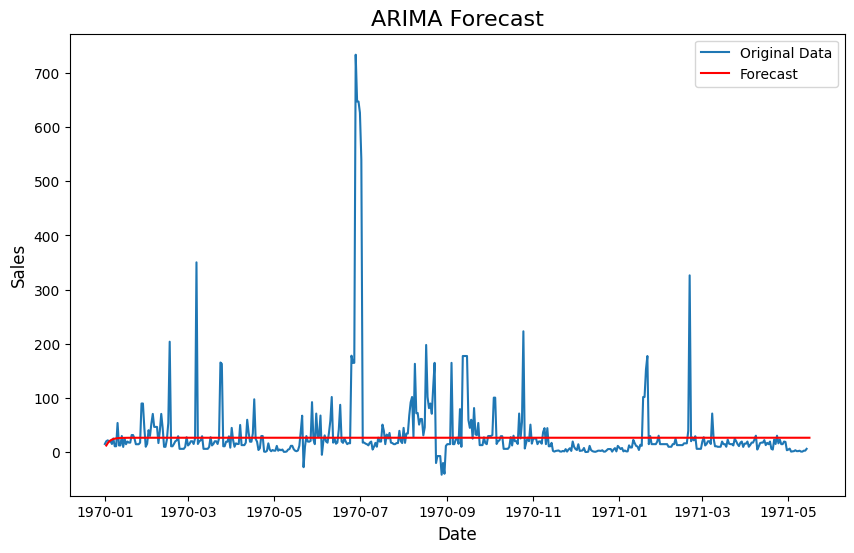

In [48]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="Original Data")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq="D")[1:], forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.show()
